In [7]:
import pandas as pd
df2=pd.read_csv("iris (2).csv")

In [11]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


df2 = pd.read_csv("iris (2).csv")


X = df2.drop('species', axis=1)
y = df2['species']


le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

print("SVM with RBF Kernel:")
print(f"Accuracy: {accuracy_rbf}")
print(f"Confusion Matrix:\n{conf_matrix_rbf}")


svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

print("\nSVM with Linear Kernel:")
print(f"Accuracy: {accuracy_linear}")
print(f"Confusion Matrix:\n{conf_matrix_linear}")


SVM with RBF Kernel:
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM with Linear Kernel:
Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [12]:
import pandas as pd
df=pd.read_csv("letter-recognition.csv")

SVM Classifier:
Accuracy: 0.9305
Confusion Matrix:
[[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   0   0   0
   

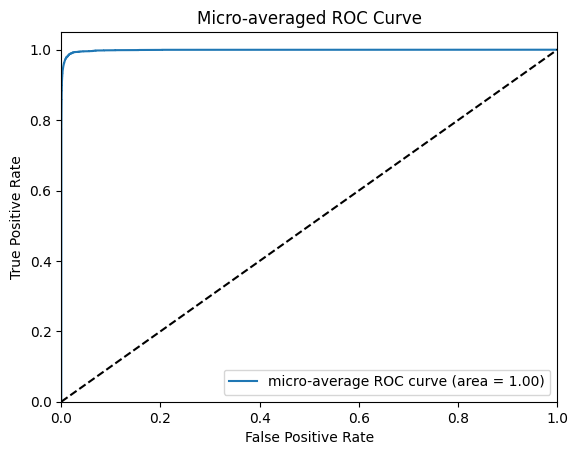

Micro-average AUC: 0.9987927175


In [13]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


X = df.drop('letter', axis=1)
y = df['letter']


le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("SVM Classifier:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")



y_test_bin = label_binarize(y_test, classes=list(range(26)))
y_score = svm_model.predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(26):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-averaged ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Micro-average AUC: {roc_auc['micro']}")


In [14]:



for i in range(26):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"AUC for class {i}: {roc_auc[i]}")




AUC for class 0: 0.999939003030678
AUC for class 1: 0.9986561126486815
AUC for class 2: 0.9946979674282119
AUC for class 3: 0.9991311801275381
AUC for class 4: 0.9988991378724139
AUC for class 5: 0.9982512953367876
AUC for class 6: 0.9977392578125
AUC for class 7: 0.991450913439373
AUC for class 8: 0.9978371519360777
AUC for class 9: 0.9995712784441939
AUC for class 10: 0.9973941562313655
AUC for class 11: 0.9991291581022693
AUC for class 12: 0.9996194328462074
AUC for class 13: 0.9993651055834577
AUC for class 14: 0.9988908269600609
AUC for class 15: 0.9981663598012902
AUC for class 16: 0.99943907083734
AUC for class 17: 0.9970524088541666
AUC for class 18: 0.9983826110064925
AUC for class 19: 0.999701006186134
AUC for class 20: 0.9993070975260232
AUC for class 21: 0.9992372775255505
AUC for class 22: 0.9998666891190255
AUC for class 23: 0.9996015425032586
AUC for class 24: 0.9998834998508799
AUC for class 25: 0.9998335213562721


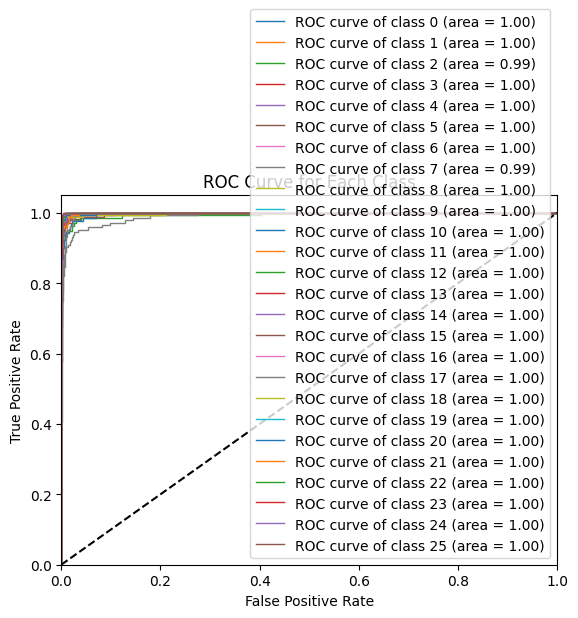

In [16]:



plt.figure()
for i in range(26):
    plt.plot(fpr[i], tpr[i], lw=1, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()
